In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 33.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


# Task 1: Data Preparation

### 1. Load the dataset into a Pandas data frame (train and test).

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, pacf, acf

#ARIMA model
from statsmodels.tsa.arima_model import ARIMA

#SARIMA MODEL
from statsmodels.tsa.statespace.sarimax import SARIMAX

#plotting acf and pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing


# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# ACF and PACF charts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# SARIMA/SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# MSE/RMSE
from sklearn.metrics import mean_squared_error

### Read data from datafile


In [ ]:
#reading the file
storesales=("/content/drive/MyDrive/MiniProject /4. Time Series/DS3_C6_S4_TimeSeries_Sales_Data_Project.xls")
storesales_data= pd.read_excel(storesales, parse_dates=True, index_col='Order Date')
storesales_data.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#Checking the size of data
print('The number of samples in data is {}.'.format(storesales_data.shape[0]))

The number of samples in data is 9994.


In [ ]:
storesales_data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
storesales_data2 = storesales_data[storesales_data["Category"]== 'Furniture']
storesales_data2

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,9963,CA-2015-168088,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2016-12-05,9965,CA-2016-146374,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2015-09-06,9981,US-2015-151435,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548


In [ ]:
storesales_data2 = storesales_data2.groupby('Order Date')['Sales'].sum().reset_index()
storesales_data2

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [ ]:
storesales_data2 = storesales_data2.set_index('Order Date')
storesales_data2

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [ ]:
storesales_data2 = storesales_data2.resample('MS').mean()
storesales_data2

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [ ]:
storesales_data2.shape

(48, 1)

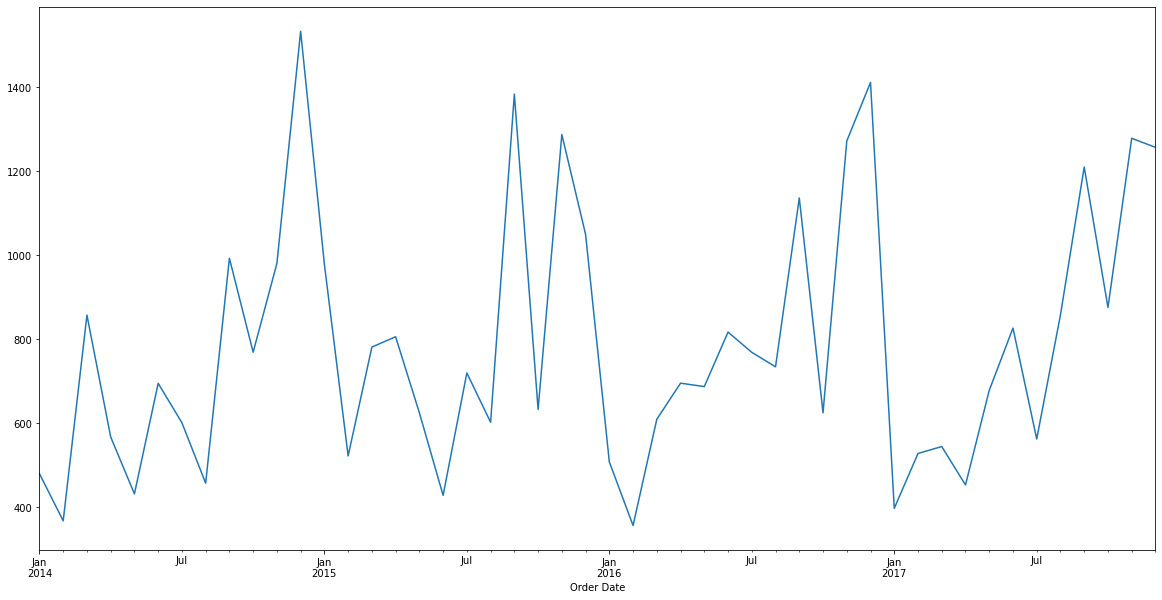

In [ ]:
storesales_data2.Sales.plot(figsize=(20,10))

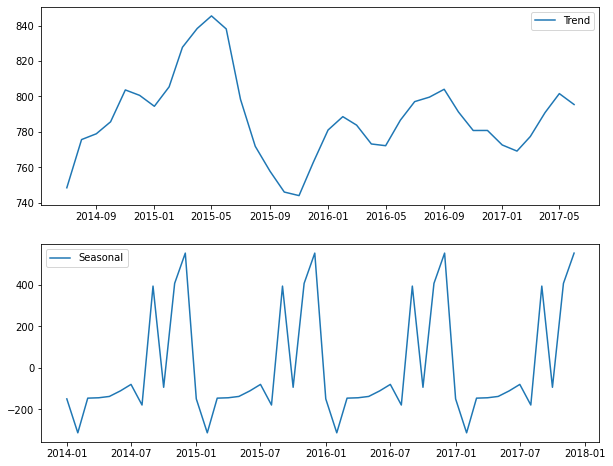

In [ ]:
#decompose the data to check for the TS compoennts 
decomp = seasonal_decompose(storesales_data2.Sales)

d_seasonal = decomp.seasonal
d_trend = decomp.trend

#plot the trend and seasonal components
fig,ax=plt.subplots(2,1,figsize=(10,8))

plt.subplot(211)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(212)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

### There is trend and seasonality in data 

In [ ]:
ratio = 0.7
rows = int(ratio * len(storesales_data2))

train = storesales_data2[:rows]
test = storesales_data2[rows:]

print("Total={}, Train={}, Test={}".format(len(storesales_data2),len(train),len(test)))

Total=48, Train=33, Test=15


### Check data for stationarity.

In [ ]:
def checkStationarity (data):
  pvalue = adfuller(data)[1]
  if pvalue < 0.05:
    ret = "Data is stationary. Proceed to model building"
  else:
    ret = "Data is not stationary. Make it statioanry"
  return(ret)

In [ ]:
checkStationarity(storesales_data2.Sales)

'Data is stationary. Proceed to model building'

### Plot ACF and PACF 

Text(0.5, 1.0, 'Auto Correlation Fuction')

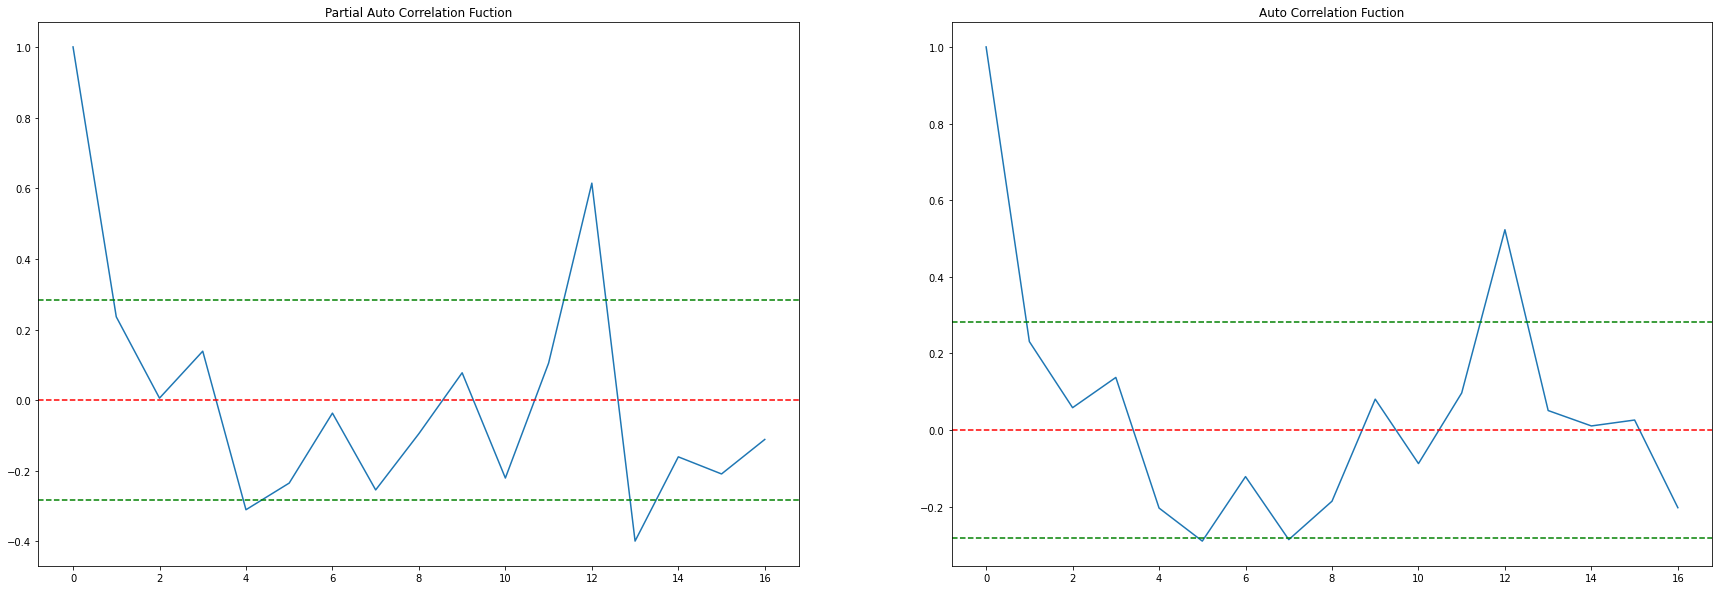

In [ ]:
sales_acf = acf(storesales_data2.Sales)   
sales_pacf = pacf(storesales_data2.Sales)
N = len(storesales_data2.Sales)
SE = 1.96/np.sqrt(len(storesales_data2.Sales))

#plot the ACF/PACF
fig,ax = plt.subplots(figsize= (30,10))

plt.subplot(121)
plt.plot(sales_pacf)
plt.axhline(y=0, linestyle = "--",color = "red")
plt.axhline(y=SE,linestyle="--",color="green")
plt.axhline(y=-SE,linestyle="--",color="green")
plt.title("Partial Auto Correlation Fuction")

plt.subplot(122)
plt.plot(sales_acf)
plt.axhline(y=0, linestyle = "--",color = "red")
plt.axhline(y=SE,linestyle="--",color="green")
plt.axhline(y=-SE,linestyle="--",color="green")
plt.title("Auto Correlation Fuction")

In [ ]:
#considering p&q values from the plots
p= np.arange(3)
q= np.arange(3)
print('p= ',p, '\nq= ',q)

p=  [0 1 2] 
q=  [0 1 2]


#Building ARMA model

In [ ]:
l=[0,1,2,3,4,5,6,7]
l1 = [0,1]
d=0
P1 = []
Q1 = []
MSE1=[]
RMSE1 = []
list1 = []
for i in l:
  for j in l1:
    P1.append(i)
    Q1.append(j)

    m1 = ARIMA(train,order=(i,0,j)).fit()

    aic1,bic1 = np.round(m1.aic,2),np.round(m1.bic,2)
    print("Model 1:AIC={},BIC={}".format(aic1,bic1))

    pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1]

    if pvalue < 0.05:
      print("Not good model")
    else:
      print("Good model")

    #forecast on the test data 
    f1 = m1.predict(start=0,end=len(test)-1)

    #store actual and predicted data in dataframe
    actual = [] ; pred = []

    for k in range(len(f1)):
      actual.append(test.Sales[k])
      pred.append(f1[k])

    df1 = pd.DataFrame({'actual':actual,'forecast':pred})
    df1['error'] = df1.actual-df1.forecast
    print(df1)
    list1.append(df1)

    #calculate the MSE
    mse1 = mean_squared_error(df1.actual,df1.forecast)
    print("ARMA Model 1. p={},q={}\n\tMSE = {}\n\tRMSE ={}".format(i,j,mse1,np.sqrt(mse1)))
    MSE1.append(mse1)
    rmse = np.sqrt(mse1)
    RMSE1.append(rmse)

Model 1:AIC=470.14,BIC=473.13


ValueError: ignored